In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\surya\OneDrive\Desktop\Sentiment Analysis\train.csv")
data.head()

,text,sentiment
0,"Now, I won't deny that when I purchased this o...",neg
1,"The saddest thing about this ""tribute"" is that...",neg
2,Last night I decided to watch the prequel or s...,neg
3,I have to admit that i liked the first half of...,neg
4,I was not impressed about this film especially...,neg


In [3]:

data = data.replace('<br /><br />', '', regex=True)



In [4]:
data.shape

(25000, 2)

In [5]:
data = data.iloc[:10000,:]

In [6]:
data.shape

(10000, 2)

In [7]:
data['sentiment'].value_counts()

pos    5015
neg    4985
Name: sentiment, dtype: int64

<Axes: >

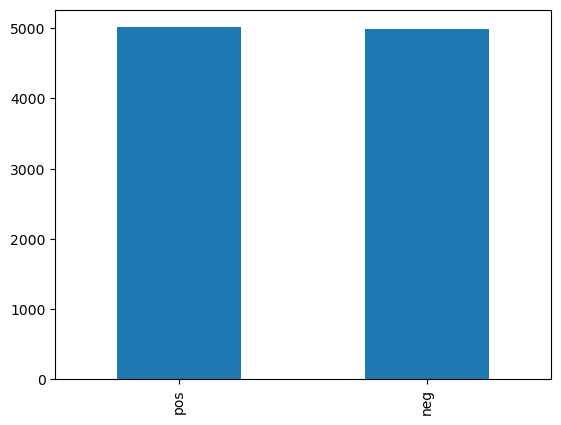

In [8]:

data['sentiment'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'sentiment distribution')

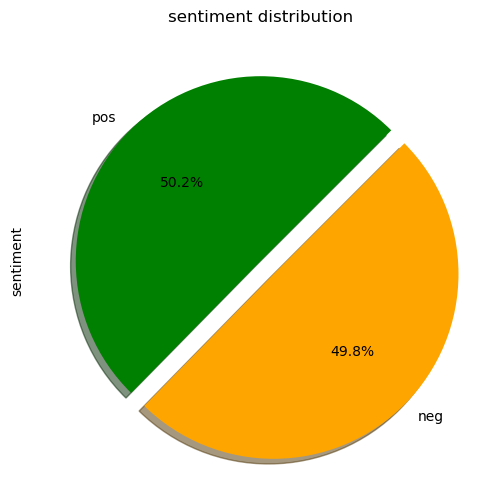

In [9]:
plt.figure(figsize=(10,6))
colors = ['green', 'orange']
data['sentiment'].value_counts().plot(kind='pie', autopct='%.1f%%',shadow = True,colors = colors,startangle = 45,
                 explode=(0, 0.1))
plt.title('sentiment distribution')

In [10]:
data['text'][999]

'Richard Dreyfuss stars in "Moon Over Parador," a 1988 Paul Mazursky film also starring Raul Julia, Sonia Braga, Jonathan Winters and Charo. Dreyfuss plays a New York actor, Jonathan Nolan, in the Caribbean country of Parador to make a film. When the dictator dies suddenly, the Secret Police Chief (Julia) who is the one actually controlling the dictator and the country, drafts Jonathan to play the dictator, having noticed the resemblance between them. Soon Jonathan is ensconced in the palace as Alphonse Simms, and Simms\' prostitute girlfriend Madonna (Braga) who realizes the switch promises to help him in any way she can.Mazursky, who appears in drag as Simms\' mother, gives us a look at how the CIA operates in third world countries. The Winters character, supposedly a salesman, is actually a CIA operative. The film, however, flirts with but doesn\'t really tread on very serious ground and is more of a send-up, and a funny one at that.Richard Dreyfuss does a fabulous job as Jonathan t

In [16]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
from nltk.stem.porter import PorterStemmer

In [18]:
stopwords_set = set(stopwords.words('english'))
emoji_pattern = re.compile('(?::|;|=)(?:-)?(?:\)|\(|D|P)')

def preprocessing(text):
    text = re.sub('<[^>]*>', '', text)
    emojis = emoji_pattern.findall(text)
    text = re.sub('[\W+]', ' ', text.lower()) + ' '.join(emojis).replace('-', '')

    prter = PorterStemmer()
    text = [prter.stem(word) for word in text.split() if word not in stopwords_set]

    return " ".join(text)

In [22]:
preprocessing('this is my tags <h1> :) <p>helo world<p> <div> <div> </h2>')

'tag helo world :)'

In [23]:
data['text'] = data['text'].apply(lambda x: preprocessing(x))

In [24]:
data['text']

0       deni purcha ebay high expect incr print work m...
1       saddest thing tribut almost singer includ othe...
2       last night decid watch prequel shall say call ...
3       admit like first half sleeper look good act ev...
4       impress film especi fact went cinema famili go...
                              ...                        
9995    saw trailer film look great went bought mistak...
9996    follow certain movi genr classifi movi industr...
9997    snarki homophob thing date 1976 seem particula...
9998    king solomon mine bring us patrick swayz play ...
9999    although without fault drama fit one shown aro...
Name: text, Length: 10000, dtype: object

In [26]:
print(data['sentiment'].value_counts())

pos    5015
neg    4985
Name: sentiment, dtype: int64


In [34]:
positivedata = data[data['sentiment'] == 'pos']['text']
negdata = data[data['sentiment'] == 'neg']['text']


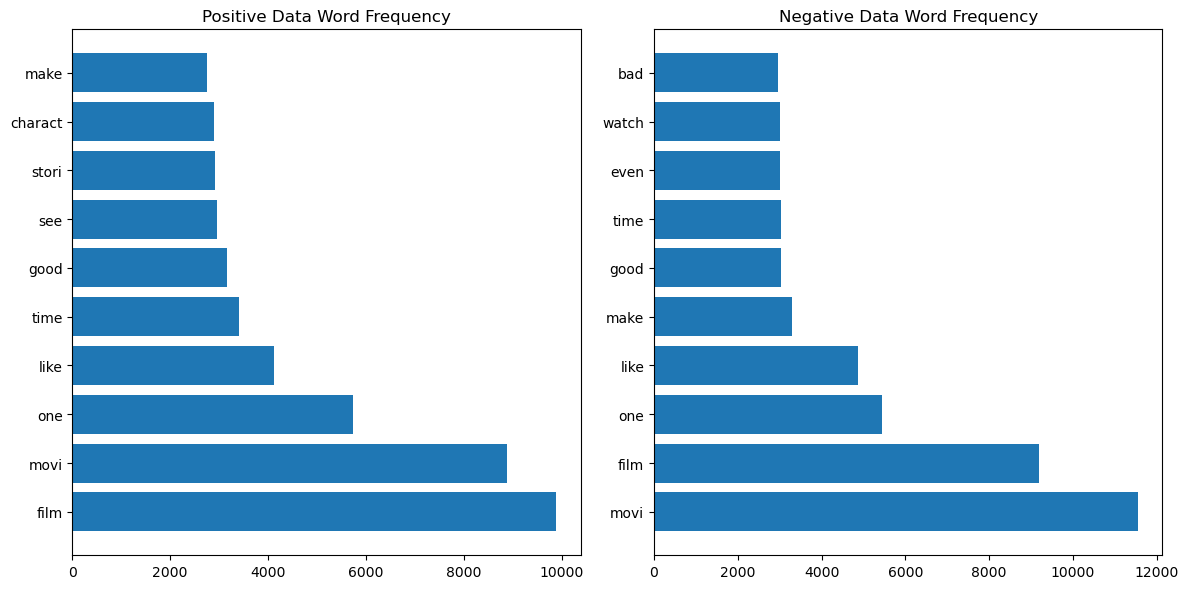

In [35]:
from collections import Counter
import matplotlib.pyplot as plt

# Correct filtering
positivedata = data[data['sentiment'] == 'pos']['text']
negdata = data[data['sentiment'] == 'neg']['text']

# Convert to words
positivedata_words = ' '.join(positivedata).split()
negdata_words = ' '.join(negdata).split()

# Count words
positivedata_word_counts = Counter(positivedata_words).most_common(10)
negdata_word_counts = Counter(negdata_words).most_common(10)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].barh(range(len(positivedata_word_counts)), [count for _, count in positivedata_word_counts])
axes[0].set_yticks(range(len(positivedata_word_counts)))
axes[0].set_yticklabels([word for word, _ in positivedata_word_counts])
axes[0].set_title('Positive Data Word Frequency')

axes[1].barh(range(len(negdata_word_counts)), [count for _, count in negdata_word_counts])
axes[1].set_yticks(range(len(negdata_word_counts)))
axes[1].set_yticklabels([word for word, _ in negdata_word_counts])
axes[1].set_title('Negative Data Word Frequency')

plt.tight_layout()
plt.show()


In [36]:
print(data['sentiment'].unique())
print(data['sentiment'].value_counts())


['neg' 'pos']
pos    5015
neg    4985
Name: sentiment, dtype: int64


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
y=data.sentiment.values
x=tfidf.fit_transform(data.text)

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

In [39]:
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:   21.0s remaining:   10.5s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   21.6s finished


In [40]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8698


In [41]:
import pickle
pickle.dump(clf,open('clf.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))

In [42]:
def prediction(comment):
    preprocessed_comment = preprocessing(comment)
    comment_list = [preprocessed_comment]  # Wrap the preprocessed comment in a list
    comment_vector = tfidf.transform(comment_list)
    prediction_result = clf.predict(comment_vector)[0]
    return prediction_result

# Use a different name for the output
result = prediction('saw trailer film look great went bought mistak act shambl special effect could call look like someth place school play charact stupid film cring minut screen unfortun often stori forget warn wast money film one worst thing ever seen reason like film watch troll 2 probabl enjoy well')

print("Prediction:", result)


Prediction: neg


In [43]:
if prediction == 1:
    print("positive comment")
else:
    print("negative comment")
    

negative comment


In [44]:
data['text'][9995]

'saw trailer film look great went bought mistak act shambl special effect could call look like someth place school play charact stupid film cring minut screen unfortun often stori forget warn wast money film one worst thing ever seen reason like film watch troll 2 probabl enjoy well'

In [45]:
data['text'][0]

'deni purcha ebay high expect incr print work master comedi enjoy howev soon disappoint apolog enjoy found compleat al difficult watch got smile sure major funni came music video got dvd rest basic filler could tell al greatest video achiev honor goe uhf honestli doubt ever make jump dvd ultra hardcor al fan everyth buy tape ebay pay much'

In [47]:
data['text'][9998]

'king solomon mine bring us patrick swayz play allan quatermain spent lot time africa decid time return england father son find wife parent taken custodi son littl chanc get custodi lot money law suit come alison deedi play elizabeth whose father africa held african tribe ransom map elizabeth father sent elizabeth seek quatermain take back africa find father good cast support charact go along quatermain elizabeth cour enemi russian want map also movi hold attent end patrick play ruggedli handsom honor man come rescu damsel distress patrick great dramat actor easili portray passion loss despair rug silent good man anger strength king solomon mind charact actual smile time would realli like see patrick swayz relax live love stori one clench jaw quit strong mayb littl danc would help good movi entir famili worth time watch'

In [49]:
result = prediction('king solomon mine bring us patrick swayz play allan quatermain spent lot time africa decid time return england father son find wife parent taken custodi son littl chanc get custodi lot money law suit come alison deedi play elizabeth whose father africa held african tribe ransom map elizabeth father sent elizabeth seek quatermain take back africa find father good cast support charact go along quatermain elizabeth cour enemi russian want map also movi hold attent end patrick play ruggedli handsom honor man come rescu damsel distress patrick great dramat actor easili portray passion loss despair rug silent good man anger strength king solomon mind charact actual smile time would realli like see patrick swayz relax live love stori one clench jaw quit strong mayb littl danc would help good movi entir famili worth time watch')

print("Prediction:", result)


Prediction: pos
